In [89]:
import pandas as pd
import numpy as np
import matplotlib as plt
import xarray as xr
from datetime import datetime
import itertools

In [3]:
CO2_mix_S1=xr.open_dataset('CO2_per_mix_S1.nc')
CO2_mix_S2=xr.open_dataset('CO2_per_mix_S2.nc')
display(CO2_mix_S1)

<xarray.Dataset>
Dimensions:                        (Date: 365, year: 31, Hour: 24, technology: 9)
Coordinates:
  * Date                           (Date) int32 1 2 3 4 5 ... 362 363 364 365
  * year                           (year) float64 2.02e+03 ... 2.05e+03
  * Hour                           (Hour) int32 0 1 2 3 4 5 ... 19 20 21 22 23
  * technology                     (technology) object 'Autre renouvelables' ...
Data variables:
    __xarray_dataarray_variable__  (Date, year, Hour, technology) float64 ...

In [4]:
year_val=CO2_mix_S1.coords['year'].values
date_val=CO2_mix_S1.coords['Date'].values
hour_val=CO2_mix_S1.coords['Hour'].values

In [7]:
sum_CO2_S1=CO2_mix_S1.sum(dim="technology")
sum_CO2_S2=CO2_mix_S2.sum(dim="technology")

stored_CO2_arrays= (sum_CO2_S1, sum_CO2_S2)

In [40]:
scenario_dic ={}
scenario_dic['S1']={}
scenario_dic['S2']={}

for key,value in enumerate(['S1', 'S2']):
    for yeari in year_val:
        d=pd.DataFrame()
        print(yeari)
        #Date_amounts = []
        for Datei in date_val:
            Hour_amounts = []
            for houri in hour_val:
                    test04=stored_CO2_arrays[key].sel(
                        year=yeari,
                        Date=Datei,
                        Hour=houri,
                    ).to_array().values[0]
                    Hour_amounts.append(test04)
            d2=pd.DataFrame(Hour_amounts)
            d=pd.concat([d,d2])
        scenario_dic[value][yeari]={}
        scenario_dic[value][yeari][0]=d


2020.0
2021.0
2022.0
2023.0
2024.0
2025.0
2026.0
2027.0
2028.0
2029.0
2030.0
2031.0
2032.0
2033.0
2034.0
2035.0
2036.0
2037.0
2038.0
2039.0
2040.0
2041.0
2042.0
2043.0
2044.0
2045.0
2046.0
2047.0
2048.0
2049.0
2050.0
2020.0
2021.0
2022.0
2023.0
2024.0
2025.0
2026.0
2027.0
2028.0
2029.0
2030.0
2031.0
2032.0
2033.0
2034.0
2035.0
2036.0
2037.0
2038.0
2039.0
2040.0
2041.0
2042.0
2043.0
2044.0
2045.0
2046.0
2047.0
2048.0
2049.0
2050.0


In [58]:
for scenario in scenario_dic.keys():
    #print(scenario)
    for yeari in year_val:
        scenario_dic[scenario][yeari][0].reset_index(inplace=True, drop=True)
        #if yeari==2045:
        # if yeari%2==0:
        #     print("EVEN")
        # else:
        #     print("ODD")
            #display(scenario_dic[scenario][yeari])
        if yeari%2==0:
            timestep = pd.Series(pd.date_range(start=f'{int(yeari)}-01-01', end=f'{int(yeari)}-12-31 23:00:00', freq='H'))
            dates = pd.date_range(start=f'{int(yeari)}-01-01', end=f'{int(yeari)}-12-31')
            num_repeats = 24

            scenario_dic[scenario][yeari][0]['Timestamp']=timestep
            scenario_dic[scenario][yeari][0]['Date']= pd.DataFrame(dates.repeat(num_repeats),columns=['date'])
            scenario_dic[scenario][yeari][0]['Hour'] = pd.to_datetime(scenario_dic[scenario][yeari][0]['Timestamp']).dt.strftime('%H:%M:%S')
            scenario_dic[scenario][yeari][0].rename(columns={0:"CO2"}, inplace=True)
            
        else:
            timestep = pd.Series(pd.date_range(start=f'{int(yeari)}-01-01', end=f'{int(yeari)}-12-31 23:00:00', freq='H'))
            dates = pd.date_range(start=f'{int(yeari)}-01-01', end=f'{int(yeari)}-12-31')
            num_repeats = 24

            scenario_dic[scenario][yeari][0]['Timestamp']=timestep
            scenario_dic[scenario][yeari][0]['Date']= pd.DataFrame(dates.repeat(num_repeats),columns=['date'])
            scenario_dic[scenario][yeari][0]['Hour'] = pd.to_datetime(scenario_dic[scenario][yeari][0]['Timestamp']).dt.strftime('%H:%M:%S')
            scenario_dic[scenario][yeari][0].rename(columns={0:"CO2"}, inplace=True)
        if yeari==2028:
            if scenario=="S1":
                display(scenario_dic[scenario][yeari][0])#.to_string())
            

,CO2,Timestamp,Date,Hour
0,0.058565,2028-01-01 00:00:00,2028-01-01,00:00:00
1,0.055515,2028-01-01 01:00:00,2028-01-01,01:00:00
2,0.050192,2028-01-01 02:00:00,2028-01-01,02:00:00
3,0.040667,2028-01-01 03:00:00,2028-01-01,03:00:00
4,0.036473,2028-01-01 04:00:00,2028-01-01,04:00:00
...,...,...,...,...
8755,0.054683,2028-12-30 19:00:00,2028-12-30,19:00:00
8756,0.054261,2028-12-30 20:00:00,2028-12-30,20:00:00
8757,0.053164,2028-12-30 21:00:00,2028-12-30,21:00:00
8758,0.053033,2028-12-30 22:00:00,2028-12-30,22:00:00


In [109]:
for scenario in scenario_dic.keys():
    #print(scenario)
    for yeari in year_val:
        scenario_dic[scenario][yeari][4]=scenario_dic[scenario][yeari][0].copy().groupby('Date').max(numeric_only=True)
        scenario_dic[scenario][yeari][1]=scenario_dic[scenario][yeari][0].copy().groupby('Date').min(numeric_only=True)
        if yeari==2025:
            display( scenario_dic[scenario][yeari][1])
            display( scenario_dic[scenario][yeari][4])


#opt2040_base['CO2']=test2040_base.groupby("Date").min(numeric_only=True)

,CO2
Date,
2025-01-01,0.038456
2025-01-02,0.054558
2025-01-03,0.043494
2025-01-04,0.049802
2025-01-05,0.063358
...,...
2025-12-27,0.032844
2025-12-28,0.033571
2025-12-29,0.034024


,CO2
Date,
2025-01-01,0.066157
2025-01-02,0.072763
2025-01-03,0.071505
2025-01-04,0.069915
2025-01-05,0.072265
...,...
2025-12-27,0.036431
2025-12-28,0.036854
2025-12-29,0.051821


,CO2
Date,
2025-01-01,0.038207
2025-01-02,0.054295
2025-01-03,0.043235
2025-01-04,0.049539
2025-01-05,0.063083
...,...
2025-12-27,0.032599
2025-12-28,0.033330
2025-12-29,0.033779


,CO2
Date,
2025-01-01,0.065897
2025-01-02,0.072132
2025-01-03,0.071200
2025-01-04,0.069640
2025-01-05,0.071995
...,...
2025-12-27,0.036178
2025-12-28,0.036595
2025-12-29,0.051573


In [110]:
# for scenario in scenario_dic.keys():
#     #print(scenario)
#     for yeari in year_val:
#         scenario_dic[scenario][yeari][4]=scenario_dic[scenario][yeari][0].copy().groupby('Date').max(numeric_only=True)
#         if yeari==2025:
#             display( scenario_dic[scenario][yeari][4])


# #opt2040_base['CO2']=test2040_base.groupby("Date").min(numeric_only=True)

In [111]:
for scenario in scenario_dic.keys():
    #print(scenario)
    for yeari in year_val:
        #scenario_dic[scenario][yeari][0]['Timestamp'].to_timestamp()=pd.to_datetime(scenario_dic[scenario][yeari][0]['Timestamp'].to_timestamp())
        grouped=scenario_dic[scenario][yeari][0].groupby(pd.to_datetime(scenario_dic[scenario][yeari][0]['Timestamp']).dt.date)
       # if yeari==2025:
        #    for date , group in grouped:
         #       print(date)
          #      print(group)
                #print
           #     if date==datetime.strptime("2025-05-02", '%Y-%m-%d'):
                    #print(date)
                    #display(grouped)
        dates=[]
        lowest_hour=[]
        for date, group in grouped:
             min_row = group.loc[group['CO2'].idxmin()]
             dates.append(date)
             lowest_hour.append(min_row['Hour'])
        scenario_dic[scenario][yeari][2] = pd.DataFrame({'Date': dates, 'Lowest_CO2_Hour': lowest_hour})
display(scenario_dic['S1'][2035][2])

,Date,Lowest_CO2_Hour
0,2035-01-01,04:00:00
1,2035-01-02,04:00:00
2,2035-01-03,05:00:00
3,2035-01-04,05:00:00
4,2035-01-05,05:00:00
...,...,...
360,2035-12-27,23:00:00
361,2035-12-28,14:00:00
362,2035-12-29,00:00:00
363,2035-12-30,04:00:00


In [112]:
pd.to_datetime(scenario_dic[scenario][yeari][0]['Timestamp']).dt.date

0       2050-01-01
1       2050-01-01
2       2050-01-01
3       2050-01-01
4       2050-01-01
           ...    
8755    2050-12-31
8756    2050-12-31
8757    2050-12-31
8758    2050-12-31
8759    2050-12-31
Name: Timestamp, Length: 8760, dtype: object

In [91]:
#Temperature for 2022 originate from: https://www.visualcrossing.com/weather/weather-data-services

# https://doi.org/10.1016/j.jclepro.2019.119403
#The study found that, when the ambient temperature 
#is lower than 10 C, electricity consumption increases 2.4 kWh/100 km for every 5 C decrease in temperature. 
#When it is higher than 28 C, EC increases 2.3 kWh/100 km for every 5 C increase in temperature.

temp = pd.read_csv('Temperature_France_2022.csv', usecols=["Average_FR"])
temp

year= 2022
timestep = pd.Series(pd.date_range(start=f'{year}-01-01', end=f'{year}-12-31 23:00:00', freq='D'))
dates = pd.date_range(start=f'{year}-01-01', end=f'{year}-12-31')
num_repeats = 24

b= pd.DataFrame()#{'Timestamp': timestep})
#b['Date']= pd.DataFrame(dates.repeat(num_repeats),columns=['date'])
#b['Hour'] = pd.to_datetime(df01['Timestamp']).dt.strftime('%H:%M:%S')
b['Inside temp car'] = list(itertools.repeat(19, 365))
b['Temperature_FR']=temp
b['E_demand@19(kWh/100km)']= list(itertools.repeat(14.4, 365))
b

s=[]

for item in b['Temperature_FR']:
    if item<=10:
        s.append(((item/5) * 2.4)+14.4),
    else: s.append(0)

b['cold']=s

r=[]

for item in b['Temperature_FR']:
    if item>=25:
        r.append(((item/5) * 2.3)+14.4),
    else: r.append(0)

b['warm']=r

b['total_e_consumption']=b['cold']+b['warm']

t=[]

for item in b['total_e_consumption']:
    if item==0:
        t.append(14.4)
    else: t.append(item)

b['total_e_consumption_1']=t
b
#b.drop(['Timestamp', 'Date', 'Hour'], axis=1)

,Inside temp car,Temperature_FR,E_demand@19(kWh/100km),cold,warm,total_e_consumption,total_e_consumption_1
0,19,9.85,14.4,19.128,0.0,19.128,19.128
1,19,11.10,14.4,0.000,0.0,0.000,14.400
2,19,10.20,14.4,0.000,0.0,0.000,14.400
3,19,10.45,14.4,0.000,0.0,0.000,14.400
4,19,6.30,14.4,17.424,0.0,17.424,17.424
...,...,...,...,...,...,...,...
360,19,8.00,14.4,18.240,0.0,18.240,18.240
361,19,9.80,14.4,19.104,0.0,19.104,19.104
362,19,11.70,14.4,0.000,0.0,0.000,14.400
363,19,11.15,14.4,0.000,0.0,0.000,14.400


In [114]:
for scenario in scenario_dic:
    for yeari in year_val:
        opt_con=scenario_dic[scenario][yeari][1]['CO2'].values*b['total_e_consumption_1'].values
        opt_con=opt_con.sum()
        scenario_dic[scenario][yeari][3]=opt_con
display(scenario_dic["S1"][2050][3])
#opt_con_v1= b['total_e_consumption_1'].values*opt['CO2'].values
#opt_con_v1.sum()

118.63618551697164

In [113]:
for scenario in scenario_dic:
    for yeari in year_val:
        opt_con=scenario_dic[scenario][yeari][4]['CO2'].values*b['total_e_consumption_1'].values
        opt_con=opt_con.sum()
        scenario_dic[scenario][yeari][4]=opt_con
display(scenario_dic["S1"][2050][4])
#opt_con_v1= b['total_e_consumption_1'].values*opt['CO2'].values
#opt_con_v1.sum()

164.4665687444813

In [116]:
print(scenario_dic["S1"][2022][3])
print(scenario_dic["S1"][2022][4])
print(scenario_dic["S1"][2030][3])
print(scenario_dic["S1"][2030][4])
print(scenario_dic["S1"][2040][3])
print(scenario_dic["S1"][2040][4])
print(scenario_dic["S1"][2050][3])
print(scenario_dic["S1"][2050][4])

print(scenario_dic["S2"][2022][3])
print(scenario_dic["S2"][2022][4])
print(scenario_dic["S2"][2030][3])
print(scenario_dic["S2"][2030][4])
print(scenario_dic["S2"][2040][3])
print(scenario_dic["S2"][2040][4])
print(scenario_dic["S2"][2050][3])
print(scenario_dic["S2"][2050][3])

SyntaxError: '(' was never closed (1505957038.py, line 2)

[Text(0, 0, '286.157'),
 Text(0, 0, '394.235'),
 Text(0, 0, '118.636'),
 Text(0, 0, '164.467'),
 Text(0, 0, '285.465'),
 Text(0, 0, '393.052'),
 Text(0, 0, '105.239'),
 Text(0, 0, '157.982')]

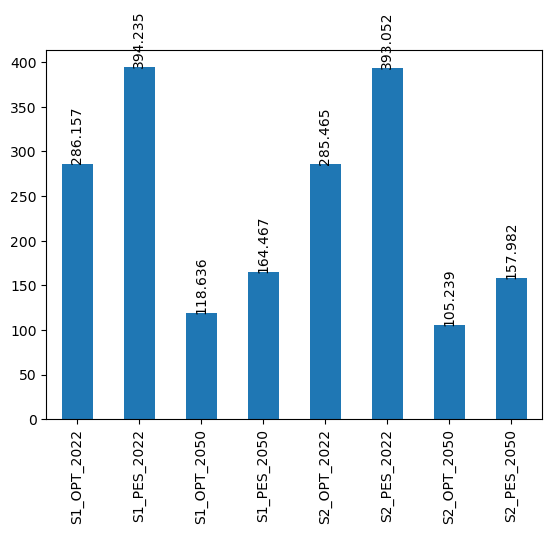

In [117]:
Scores = [scenario_dic["S1"][2022][3], scenario_dic["S1"][2022][4], scenario_dic["S1"][2050][3], scenario_dic["S1"][2050][4], scenario_dic["S2"][2022][3], scenario_dic["S2"][2022][4], scenario_dic["S2"][2050][3], scenario_dic["S2"][2050][4]]
score_series = pd.Series(Scores)
x_labels = ['S1_OPT_2022', 'S1_PES_2022', 'S1_OPT_2050', 'S1_PES_2050', 'S2_OPT_2022', 'S2_PES_2022', 'S2_OPT_2050', 'S2_PES_2050']

fig = score_series.plot(kind='bar')#, color =['#442288', '#6CA2EA', '#B5D33D'])
#fig.('CC of annual energy consumption')
fig.set_xticklabels(x_labels)
fig.bar_label(fig.containers[0], label_type='edge', rotation=90)